In [76]:
pip install torch numpy pandas scikit-learn tensorflow shap scikit-optimize openpyxl numpy matplotlib scikit-learn scipy tensorflow boruta


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
from BTC_helper import *
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from skopt import BayesSearchCV
import shap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def prepare_data(df, model_type):
    # Separate the dependent and independent variables
    X = df.drop('price_inconsistency', axis=1)
    y = df['price_inconsistency']

    # Split the data into training + validation and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Then split the training + validation set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=False)

    # Create a MinMaxScaler object
    scaler = MinMaxScaler()

    # Fit the scaler on the training data
    scaler.fit(X_train)

    # Transform the training, validation, and test data
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Reshape the input data to fit the CNN-BiLSTM model (samples, time steps, features)
    if model_type == 'CNN-BiLSTM':
        X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
        X_val_scaled = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
        X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test


def load_date_to_index(file_path):
    df = pd.read_csv(file_path) # Load the csv file
    df['Date'] = pd.to_datetime(df['Date']) # Convert the 'Date' column to datetime format
    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)
    return df

# Load the preprocessed csv files
BTC_fundamental_indicators = pd.read_csv("/content/df_BTC_fundamental_indicators.csv")
BTC_technical_indicators = pd.read_csv("/content/df_BTC_technical_indicators.csv")
BTC_technical_fundamental_combined = pd.read_csv("/content/df_technical_fundamental_combined.csv")

# Load and prepare the data
BTC_fundamental_indicators = load_date_to_index("/content/df_BTC_fundamental_indicators.csv")
BTC_technical_indicators = load_date_to_index("/content/df_BTC_technical_indicators.csv")
BTC_technical_fundamental_combined = load_date_to_index("/content/df_technical_fundamental_combined.csv")

print("BTC_fundamental_indicators: ",BTC_fundamental_indicators.shape)
print("BTC_technical_indicators: ",BTC_technical_indicators.shape)
print("BTC_technical_fundamental_combined: ",BTC_technical_fundamental_combined.shape)



BTC_fundamental_indicators:  (3160, 32)
BTC_technical_indicators:  (3161, 88)
BTC_technical_fundamental_combined:  (3160, 119)


In [ ]:
#print("BTC_fundamental_indicators: ",BTC_fundamental_indicators.info())
#print("BTC_technical_indicators: ",BTC_technical_indicators.columns)
#print("BTC_technical_fundamental_combined: ",BTC_technical_fundamental_combined.columns)
#address missing data¶
print("BTC_fundamental_indicators - missing values ")
num_missing = BTC_fundamental_indicators.isnull().sum()
print(num_missing[num_missing >0])

print("BTC_technical_indicators - missing values ")
num_missing = BTC_technical_indicators.isnull().sum()
print(num_missing[num_missing >0])

print("BTC_technical_fundamental_combined - missing values ")
num_missing = BTC_technical_fundamental_combined.isnull().sum()
print(num_missing[num_missing >0])


BTC_fundamental_indicators - missing values 
Series([], dtype: int64)
BTC_technical_indicators - missing values 
Series([], dtype: int64)
BTC_technical_fundamental_combined - missing values 
Series([], dtype: int64)


In [ ]:
BTC_fundamental_indicators_features=apply_feature_selection_RF_Boruta(BTC_fundamental_indicators,max_itr=100)  


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	25
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	25
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	25
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	25
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	27
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	27
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	27
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	27
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	27
Tentative: 	4
Rejected: 	0
I

In [ ]:
BTC_technical_indicators = BTC_technical_indicators.fillna(method='ffill')
BTC_technical_indicators = BTC_technical_indicators.fillna(method='bfill')
BTC_technical_indicators_features=apply_feature_selection_RF_Boruta(BTC_technical_indicators,max_itr=100)  

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	87
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	20
Rejected: 	50
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	20
Rejected: 	50
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	20
Rejected: 	50
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	20
Rejected: 	50
Iteration: 	12 / 100
Confirmed: 	21
Tentative: 	16
Rejected: 	50
Iteration: 	13 / 100
Confirmed: 	21
Tentative: 	16
Rejected: 	50
Iteration: 	14 / 100
Confirmed: 	21
Tentative: 	15
Rejected: 	51
Iteration: 	15 / 100
Confirmed: 	21
Tentative: 	15
Rejected: 	51
Iteration: 	16 / 100
Confirmed: 	22
Tentative: 	

In [ ]:
BTC_technical_fundamental_combined_features=apply_feature_selection_RF_Boruta(BTC_technical_fundamental_combined,max_itr=100)  


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	118
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	118
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	118
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	118
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	118
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	118
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	118
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	27
Rejected: 	76
Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	27
Rejected: 	76
Iteration: 	10 / 100
Confirmed: 	15
Tentative: 	27
Rejected: 	76
Iteration: 	11 / 100
Confirmed: 	15
Tentative: 	27
Rejected: 	76
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	25
Rejected: 	76
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	25
Rejected: 	76
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	25
Rejected: 	76
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	25
Rejected: 	76
Iteration: 	16 / 100
Confirmed: 	19
Tenta

In [ ]:
len(BTC_fundamental_indicators_features.columns)

29

In [ ]:
print("BTC_fundamental_indicators: ",BTC_fundamental_indicators_features.shape)
print("BTC_technical_indicators: ",BTC_technical_indicators_features.shape)
print("BTC_technical_fundamental_combined: ",BTC_technical_fundamental_combined_features.shape)
BTC_fundamental_indicators_features.to_csv("BTC_fundamental_indicators_features.csv")
BTC_technical_indicators_features.to_csv("BTC_technical_indicators_features.csv")
BTC_technical_fundamental_combined_features.to_csv("BTC_technical_fundamental_combined_features.csv")

BTC_fundamental_indicators:  (3160, 29)
BTC_technical_indicators:  (3161, 25)
BTC_technical_fundamental_combined:  (3160, 26)


In [ ]:
BTC_technical_indicators_features

,Open,High,Low,volume_adi,volume_obv,volume_em,volume_vpt,volume_nvi,volatility_bbm,volatility_bbh,...,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_b,trend_psar_up,momentum_rsi,momentum_stoch_rsi,Close
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,-7.924336e+06,2.105680e+07,0.000000,4.229223e+06,1000.000000,457.334015,457.334015,...,457.334015,457.334015,457.334015,460.298004,460.298004,460.298004,289.29599,100.000000,0.000000,457.334015
2014-09-18,456.859985,456.859985,413.104004,-2.454020e+07,-1.342640e+07,-3212.366726,-2.281631e+07,1000.000000,440.887009,473.781021,...,440.887009,452.273398,454.897421,440.639008,440.639008,440.639008,289.29599,0.000000,0.000000,424.440002
2014-09-19,424.102997,427.834992,384.532013,-4.448391e+07,-5.134610e+07,-3288.687672,-5.128636e+06,1000.000000,425.523336,476.608398,...,425.523336,443.430720,450.445464,426.353012,426.353012,426.353012,289.29599,0.000000,0.000000,394.795990
2014-09-20,394.673004,423.295990,389.882996,-3.937687e+07,-1.448250e+07,36.798798,-1.331094e+06,1035.734916,421.368500,467.891770,...,421.368500,438.118915,447.368317,426.353012,426.353012,426.353012,289.29599,20.155072,0.000000,408.903992
2014-09-21,408.084992,412.425995,393.181000,-5.037763e+07,-4.106260e+07,-274.120355,6.618911e+05,1010.195201,416.859003,462.212070,...,416.859003,432.073084,443.772221,426.353012,426.353012,426.353012,289.29599,17.448333,0.000000,398.821014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09,27695.068360,27821.400390,27375.601560,4.220000e+12,1.170000e+12,-1224.892385,-5.293346e+08,656.773791,28469.596290,29869.677760,...,28814.490530,28506.333240,28551.579780,28565.130860,29038.228520,28806.148440,27653.70807,42.871754,0.000000,27658.775390
2023-05-10,27654.636720,28322.687500,26883.669920,4.220000e+12,1.150000e+12,32.587790,-4.575658e+07,656.773791,28438.384670,29884.101800,...,28704.338870,28370.244410,28482.703930,28351.898440,28742.705080,28806.148440,27653.70807,42.616180,0.000000,27621.755860
2023-05-11,27621.085940,27621.941410,26781.826170,4.210000e+12,1.130000e+12,-2015.827817,-4.036280e+08,642.008809,28424.578610,29918.856770,...,28576.734750,28159.558970,28372.932460,28300.976560,28668.681640,28806.148440,27653.70807,38.473095,0.000000,27000.789060


In [ ]:
#print(kraken_data_encoded_features.columns)
#print(coinbase_data_encoded_features.columns)
#print(binance_data_encoded_features.columns)

#HIGH CORRELATION TREATMENT
corr_features_fundamental = correlation(BTC_fundamental_indicators_features, 0.95)
print('corr_features_fundamental correlated features: ', len(set(corr_features_fundamental)) )
print(corr_features_fundamental)
print("")
corr_features_technical = correlation(BTC_technical_indicators_features, 0.95)
print('corr_features_technical correlated features: ', len(set(corr_features_technical)) )
print(corr_features_technical)
print("")
corr_features_fund_tech = correlation(BTC_technical_fundamental_combined_features, 0.95)
print('corr_features_fund_tech correlated features: ', len(set(corr_features_fund_tech)) )
print(corr_features_fund_tech)



corr_features_fundamental correlated features:  3
{'Dow_Jones30_Close', 'NASDAQ_Close', 'WALLET_ACTIVITY_blockchain.com_wallets'}

corr_features_technical correlated features:  17
{'volatility_bbl', 'Close', 'trend_ichimoku_b', 'Low', 'trend_ema_fast', 'trend_psar_up', 'volatility_dch', 'trend_sma_slow', 'trend_ichimoku_base', 'volatility_kcl', 'volatility_dcm', 'trend_ema_slow', 'volatility_bbh', 'volatility_bbm', 'volatility_dcl', 'High', 'trend_ichimoku_conv'}

corr_features_fund_tech correlated features:  15
{'Close', 'trend_ichimoku_b', 'Low', 'trend_ema_fast', 'trend_psar_up', 'volatility_dch', 'trend_sma_slow', 'trend_ichimoku_base', 'volatility_kcl', 'trend_ema_slow', 'volatility_bbh', 'volatility_bbm', 'volatility_dcl', 'High', 'trend_ichimoku_conv'}


In [ ]:
print("Fundamental Indicators")
df_reduced_fundamental_indicators_corr= BTC_fundamental_indicators_features.drop(columns=['Dow_Jones30_Close', 'NASDAQ_Close', 'WALLET_ACTIVITY_blockchain.com_wallets'])
print(df_reduced_fundamental_indicators_corr.shape)
print(df_reduced_fundamental_indicators_corr.columns)
print("")
print("Technical Indicators")
df_reduced_technical_indicators_corr= BTC_technical_indicators_features.drop(columns=['volatility_bbl','trend_ichimoku_b', 'Low', 'trend_ema_fast', 'trend_psar_up', 'volatility_dch', 'trend_sma_slow', 'trend_ichimoku_base', 'volatility_kcl', 'volatility_dcm', 'trend_ema_slow', 'volatility_bbh', 'volatility_bbm', 'volatility_dcl', 'High', 'trend_ichimoku_conv'])
print(df_reduced_technical_indicators_corr.shape)
print(df_reduced_technical_indicators_corr.columns)
print("")
print("Fundamental and Technical Indicators")
df_reduced_technical_fundamental_corr= BTC_technical_fundamental_combined_features.drop(columns=['trend_ichimoku_b', 'Low', 'trend_ema_fast', 'trend_psar_up', 'volatility_dch', 'trend_sma_slow', 'trend_ichimoku_base', 'volatility_kcl', 'trend_ema_slow', 'volatility_bbh', 'volatility_bbm', 'volatility_dcl', 'High', 'trend_ichimoku_conv'])
print(df_reduced_technical_fundamental_corr.shape)
print(df_reduced_technical_fundamental_corr.columns)

Fundamental Indicators
(3160, 26)
Index(['CNY_USD_data_Close', 'EUR_USD_data_Close', 'GBP_USD_data_Close',
       'RUB_USD_data_Close', 'SP500_Close', 'Gold_Close',
       'WTI_crudeoil_data_Close', 'google_trends', 'Tweets',
       'US_10Y_Treasury_rate_Close', 'US_Initial_Claims_Close',
       'MARKET_SIGNALS_market_value_to_realized_value',
       'MARKET_SIGNALS_network_value_to_transactions',
       'MINING_INFORMATION_cost_of_transaction',
       'MINING_INFORMATION_cost_percent_of_transaction_volume',
       'MINING_INFORMATION_fees_per_transaction_USD',
       'MINING_INFORMATION_miners_revenue_USD',
       'MINING_INFORMATION_network_difficulty',
       'MINING_INFORMATION_total_transaction_fees_BTC',
       'MINING_INFORMATION_total_transaction_fees_USD',
       'NETWORK_ACTIVITY_confirmed_transactions_per_day',
       'NETWORK_ACTIVITY_estimated_transaction_value_BTC',
       'NETWORK_ACTIVITY_estimated_transaction_value_USD',
       'NETWORK_ACTIVITY_output_value_per_day',


In [ ]:

# FUNDAMENTAL INDICATORS
#Print VIFs after feature selection to check which values to be retained
print("# FUNDAMENTAL INDICATORS")
vif= vif_values(df_reduced_fundamental_indicators_corr).sort_values(by='VIF')
print(vif)
filtered_vif_cols=vif.query("VIF < 10") #Filter out columns with VIF less than 10
filtered_vif_cols.reset_index(level=0, inplace=True) #convert index to column
print("Selected features with VIF <10")
for row in filtered_vif_cols['index']:
    print(row)

# TECHNICAL INDICATORS
print("")
print("# TECHNICAL INDICATORS")
vif= vif_values(df_reduced_technical_indicators_corr).sort_values(by='VIF')
print(vif)
filtered_vif_cols=vif.query("VIF < 10") #Filter out columns with VIF less than 10
filtered_vif_cols.reset_index(level=0, inplace=True) #convert index to column
print("Selected features with VIF <10")
for row in filtered_vif_cols['index']:
    print(row)

# TECHNICAL & FUNDMENTAL COMBINED INDICATORS
print("# TECHNICAL & FUNDMENTAL COMBINED INDICATORS")
vif= vif_values(df_reduced_technical_fundamental_corr).sort_values(by='VIF')
print(vif)
filtered_vif_cols=vif.query("VIF < 10") #Filter out columns with VIF less than 10
filtered_vif_cols.reset_index(level=0, inplace=True) #convert index to column
print("Selected features with VIF <10")
for row in filtered_vif_cols['index']:
    print(row)

# FUNDAMENTAL INDICATORS
                                                          VIF
MARKET_SIGNALS_market_value_to_realized_value        1.194355
NETWORK_ACTIVITY_output_value_per_day                1.213640
MARKET_SIGNALS_network_value_to_transactions         1.397116
NETWORK_ACTIVITY_confirmed_transactions_per_day      1.445989
US_Initial_Claims_Close                              1.766123
MINING_INFORMATION_cost_percent_of_transaction_...   2.312646
RUB_USD_data_Close                                   2.579578
EUR_USD_data_Close                                   2.805293
MINING_INFORMATION_total_transaction_fees_BTC        2.939712
MINING_INFORMATION_miners_revenue_USD                3.003210
MINING_INFORMATION_fees_per_transaction_USD          3.068468
NETWORK_ACTIVITY_estimated_transaction_value_BTC     3.191111
US_10Y_Treasury_rate_Close                           3.529733
MINING_INFORMATION_total_transaction_fees_USD        3.705847
WTI_crudeoil_data_Close                      

In [ ]:
print("# FUNDAMENTAL INDICATORS")
df_reduced_fundamental_indicators_vif=df_reduced_fundamental_indicators_corr[['MARKET_SIGNALS_market_value_to_realized_value','NETWORK_ACTIVITY_output_value_per_day','MARKET_SIGNALS_network_value_to_transactions','NETWORK_ACTIVITY_confirmed_transactions_per_day','US_Initial_Claims_Close','MINING_INFORMATION_cost_percent_of_transaction_volume','RUB_USD_data_Close','EUR_USD_data_Close','MINING_INFORMATION_total_transaction_fees_BTC','MINING_INFORMATION_miners_revenue_USD','MINING_INFORMATION_fees_per_transaction_USD','NETWORK_ACTIVITY_estimated_transaction_value_BTC',
'US_10Y_Treasury_rate_Close','MINING_INFORMATION_total_transaction_fees_USD','WTI_crudeoil_data_Close','GBP_USD_data_Close','CNY_USD_data_Close','google_trends','Tweets','NETWORK_ACTIVITY_estimated_transaction_value_USD','MINING_INFORMATION_cost_of_transaction','Close']]
print(df_reduced_fundamental_indicators_vif.shape)
#df_reduced_vif.columns
#Display all filtered columns with VIFs less than 10. All VIFs should not be less than 10
vif_values(df_reduced_fundamental_indicators_vif).sort_values(by='VIF')

print("")
print("# TECHNICAL INDICATORS")
df_reduced_technical_indicators_vif=df_reduced_technical_indicators_corr[['momentum_rsi','volume_nvi','momentum_stoch_rsi','volume_vpt','volume_em','volume_adi','Close']]
print(df_reduced_technical_indicators_vif.shape)
#df_reduced_vif.columns
#Display all filtered columns with VIFs less than 10. All VIFs should not be less than 10
vif_values(df_reduced_technical_indicators_vif).sort_values(by='VIF')

print("")
print("# TECHNICAL & FUNDMENTAL COMBINED INDICATORS")
df_reduced_technical_fundamental_vif=df_reduced_technical_fundamental_corr[['momentum_rsi','momentum_wr','momentum_stoch_rsi','volume_vpt','volume_em','volume_nvi','Close']]
print(df_reduced_technical_fundamental_vif.shape)
#df_reduced_vif.columns
#Display all filtered columns with VIFs less than 10. All VIFs should not be less than 10
vif_values(df_reduced_technical_fundamental_vif).sort_values(by='VIF')


# FUNDAMENTAL INDICATORS
(3160, 22)

# TECHNICAL INDICATORS
(3161, 7)

# TECHNICAL & FUNDMENTAL COMBINED INDICATORS
(3160, 7)


,VIF
volume_em,1.521664
volume_vpt,1.625617
Close,1.709874
momentum_wr,2.762513
volume_nvi,4.345823
momentum_stoch_rsi,4.571774
momentum_rsi,8.550369


In [ ]:
print("Checking missing records...")
print("# FUNDAMENTAL INDICATORS")
num_missing=df_reduced_fundamental_indicators_vif.isnull().sum()
print(num_missing)

print("")
print("# TECHNICAL INDICATORS")
num_missing=df_reduced_technical_indicators_vif.isnull().sum()
print(num_missing)
print("")
print("# TECHNICAL & FUNDMENTAL COMBINED INDICATORS")
num_missing=df_reduced_technical_fundamental_vif.isnull().sum()
print(num_missing)




Checking missing records...
# FUNDAMENTAL INDICATORS
MARKET_SIGNALS_market_value_to_realized_value            0
NETWORK_ACTIVITY_output_value_per_day                    0
MARKET_SIGNALS_network_value_to_transactions             0
NETWORK_ACTIVITY_confirmed_transactions_per_day          0
US_Initial_Claims_Close                                  0
MINING_INFORMATION_cost_percent_of_transaction_volume    0
RUB_USD_data_Close                                       0
EUR_USD_data_Close                                       0
MINING_INFORMATION_total_transaction_fees_BTC            0
MINING_INFORMATION_miners_revenue_USD                    0
MINING_INFORMATION_fees_per_transaction_USD              0
NETWORK_ACTIVITY_estimated_transaction_value_BTC         0
US_10Y_Treasury_rate_Close                               0
MINING_INFORMATION_total_transaction_fees_USD            0
WTI_crudeoil_data_Close                                  0
GBP_USD_data_Close                                       0
CNY

In [ ]:
print("# FUNDAMENTAL INDICATORS")
df_reduced_fundamental_indicators_vif['Close'] = exponential_smoothing(df_reduced_fundamental_indicators_vif['Close'].values,.3)
df_reduced_fundamental_indicators_vif = df_reduced_fundamental_indicators_vif.fillna(method='bfill')
df_reduced_fundamental_indicators_vif = df_reduced_fundamental_indicators_vif.fillna(method='ffill')
num_missing=df_reduced_fundamental_indicators_vif.isnull().sum()
print(num_missing)
df_reduced_fundamental_indicators_vif.to_csv("Fundamental_indicators_FeatureSelection.csv")
print(df_reduced_fundamental_indicators_vif.tail())

print("")
print("# TECHNICAL INDICATORS")
df_reduced_technical_indicators_vif['Close'] = exponential_smoothing(df_reduced_technical_indicators_vif['Close'].values,.3)
df_reduced_technical_indicators_vif = df_reduced_technical_indicators_vif.fillna(method='bfill')
df_reduced_technical_indicators_vif = df_reduced_technical_indicators_vif.fillna(method='ffill')
num_missing=df_reduced_technical_indicators_vif.isnull().sum()
print(num_missing)
df_reduced_technical_indicators_vif.to_csv("Technical_indicators_FeatureSelection.csv")
print(df_reduced_technical_indicators_vif.tail())

print("")
print("# TECHNICAL & FUNDMENTAL COMBINED INDICATORS")
df_reduced_technical_fundamental_vif['Close'] = exponential_smoothing(df_reduced_technical_fundamental_vif['Close'].values,.3)
df_reduced_technical_fundamental_vif = df_reduced_technical_fundamental_vif.fillna(method='bfill')
df_reduced_technical_fundamental_vif = df_reduced_technical_fundamental_vif.fillna(method='ffill')
num_missing=df_reduced_technical_fundamental_vif.isnull().sum()
print(num_missing)
df_reduced_technical_fundamental_vif.to_csv("Fundamental_Technical_indicators_FeatureSelection.csv")
print(df_reduced_technical_fundamental_vif.tail())


# TECHNICAL INDICATORS
momentum_rsi          0
volume_nvi            0
momentum_stoch_rsi    0
volume_vpt            0
volume_em             0
volume_adi            0
Close                 0
dtype: int64
            momentum_rsi  volume_nvi  momentum_stoch_rsi    volume_vpt  \
Date                                                                     
2023-05-09     42.871754  656.773791            0.000000 -5.293346e+08   
2023-05-10     42.616180  656.773791            0.000000 -4.575658e+07   
2023-05-11     38.473095  642.008809            0.000000 -4.036280e+08   
2023-05-12     37.243598  642.008809            0.000000 -5.160357e+08   
2023-05-13     37.456486  642.472628            0.010863 -1.306437e+08   

              volume_em    volume_adi         Close  
Date                                                 
2023-05-09 -1224.892385  4.220000e+12  28242.311838  
2023-05-10    32.587790  4.220000e+12  28056.145045  
2023-05-11 -2015.827817  4.210000e+12  27739.538249  
2023-0

In [ ]:
df_reduced_fundamental_indicators_vif_features= read_csv("Fundamental_indicators_FeatureSelection.csv",header=0, index_col=0)
display(df_reduced_fundamental_indicators_vif_features.head(2))

df_reduced_technical_indicators_vif_features= read_csv("Technical_indicators_FeatureSelection.csv",header=0, index_col=0)
display(df_reduced_technical_indicators_vif_features.head(2))

df_reduced_technical_fundamental_vif_features= read_csv("Fundamental_Technical_indicators_FeatureSelection.csv",header=0, index_col=0)
display(df_reduced_technical_fundamental_vif_features.head(2))


,MARKET_SIGNALS_market_value_to_realized_value,NETWORK_ACTIVITY_output_value_per_day,MARKET_SIGNALS_network_value_to_transactions,NETWORK_ACTIVITY_confirmed_transactions_per_day,US_Initial_Claims_Close,MINING_INFORMATION_cost_percent_of_transaction_volume,RUB_USD_data_Close,EUR_USD_data_Close,MINING_INFORMATION_total_transaction_fees_BTC,MINING_INFORMATION_miners_revenue_USD,...,US_10Y_Treasury_rate_Close,MINING_INFORMATION_total_transaction_fees_USD,WTI_crudeoil_data_Close,GBP_USD_data_Close,CNY_USD_data_Close,google_trends,Tweets,NETWORK_ACTIVITY_estimated_transaction_value_USD,MINING_INFORMATION_cost_of_transaction,Close
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,1.94529,537235.0341,10.82127,112318.2893,295000,4.23160,0.026,1.2866,-51.14013,-9.216288e+05,...,2.622,41384.15764,94.42,1.6275,0.1629,2.04,27946,57086561.27,25.43740,457.334015
2014-09-18,1.28524,657664.3175,18.75617,77364.0000,295000,4.03473,0.026,1.2923,12.34660,2.423051e+06,...,2.618,6033.26221,93.07,1.6401,0.1629,2.07,21135,62860463.84,29.13897,447.465811


,momentum_rsi,volume_nvi,momentum_stoch_rsi,volume_vpt,volume_em,volume_adi,Close
Date,,,,,,,
2014-09-17,100.0,1000.0,0.0,4.229223e+06,0.000000,-7.924336e+06,457.334015
2014-09-18,0.0,1000.0,0.0,-2.281631e+07,-3212.366726,-2.454020e+07,447.465811


,momentum_rsi,momentum_wr,momentum_stoch_rsi,volume_vpt,volume_em,volume_nvi,Close
Date,,,,,,,
2014-09-17,100.0,-68.816573,0.0,4.229223e+06,0.000000,1000.0,457.334015
2014-09-18,0.0,-79.415295,0.0,-2.281631e+07,-3212.366726,1000.0,447.465811


In [ ]:
##########################OUTLIER TREATMENT ####################################
# Apply Hampel filter to detect outliers and impute with rolling median
print("# FUNDAMENTAL INDICATORS")
data=df_reduced_fundamental_indicators_vif_features.copy()
col_names_reduced = [column for column in df_reduced_fundamental_indicators_vif_features]
df_outliers_fundamental= hampel_filter_data(data, col_names_reduced,15,True)

print("")
print("# TECHNICAL INDICATORS")
data=df_reduced_technical_indicators_vif_features.copy()
col_names_reduced = [column for column in df_reduced_technical_indicators_vif_features]
df_outliers_technical= hampel_filter_data(data, col_names_reduced,15,True)

print("")
print("# TECHNICAL & FUNDMENTAL COMBINED INDICATORS")
data=df_reduced_technical_fundamental_vif_features.copy()
col_names_reduced = [column for column in df_reduced_technical_fundamental_vif_features]
df_outliers_technical_fundamental= hampel_filter_data(data, col_names_reduced,15,True)

# FUNDAMENTAL INDICATORS

# TECHNICAL INDICATORS

# TECHNICAL & FUNDMENTAL COMBINED INDICATORS


In [ ]:
##########################CHAOTIC NOISE TREATMENT ####################################
# Apply Savgol filter to reduce noise in the timeseries
print("Applying Savgol filter to reduce noise in the timeseries...")
from scipy.signal import savgol_filter
print("# FUNDAMENTAL INDICATORS")
col_names_reduced = [column for column in df_outliers_fundamental]
df_temp =df_outliers_fundamental.copy()
df_sg_fundamental= savgol_filter_data(df_temp,col_names_reduced,window_size=15, polynomial_degree=3)
print(df_sg_fundamental.shape)

print("")
print("# TECHNICAL INDICATORS")
col_names_reduced = [column for column in df_outliers_technical]
df_temp =df_outliers_technical.copy()
df_sg_technical= savgol_filter_data(df_temp,col_names_reduced,window_size=15, polynomial_degree=3)
print(df_sg_technical.shape)

print("")
print("# TECHNICAL & FUNDMENTAL COMBINED INDICATORS")
col_names_reduced = [column for column in df_outliers_technical_fundamental]
df_temp =df_outliers_technical_fundamental.copy()
df_sg_tech_fundamental= savgol_filter_data(df_temp,col_names_reduced,window_size=15, polynomial_degree=3)
df_sg_tech_fundamental.shape

Applying Savgol filter to reduce noise in the timeseries...
# FUNDAMENTAL INDICATORS
(3160, 22)

# TECHNICAL INDICATORS
(3161, 7)

# TECHNICAL & FUNDMENTAL COMBINED INDICATORS


(3160, 7)

In [ ]:
df_sg_fundamental.to_csv("df_sg_fundamental.csv")
df_sg_technical.to_csv("df_sg_technical.csv")
df_sg_tech_fundamental.to_csv("df_sg_tech_fundamental.csv")

df_sg_fundamental= read_csv("df_sg_fundamental.csv",header=0, index_col=0)
display(df_sg_fundamental.head(2))

df_sg_technical= read_csv("df_sg_technical.csv",header=0, index_col=0)
display(df_sg_technical.head(2))

df_sg_tech_fundamental= read_csv("df_sg_tech_fundamental.csv",header=0, index_col=0)
display(df_sg_tech_fundamental.head(2))

NameError: ignored

#run FROM HERE  to load saved dataframe after pre-processing

In [78]:
df_sg_fundamental= read_csv("df_sg_fundamental.csv",header=0, index_col=0)
display(df_sg_fundamental.head(2))

df_sg_technical= read_csv("df_sg_technical.csv",header=0, index_col=0)
display(df_sg_technical.head(2))

df_sg_tech_fundamental= read_csv("df_sg_tech_fundamental.csv",header=0, index_col=0)
display(df_sg_tech_fundamental.head(2))

,MARKET_SIGNALS_market_value_to_realized_value,NETWORK_ACTIVITY_output_value_per_day,MARKET_SIGNALS_network_value_to_transactions,NETWORK_ACTIVITY_confirmed_transactions_per_day,US_Initial_Claims_Close,MINING_INFORMATION_cost_percent_of_transaction_volume,RUB_USD_data_Close,EUR_USD_data_Close,MINING_INFORMATION_total_transaction_fees_BTC,MINING_INFORMATION_miners_revenue_USD,...,US_10Y_Treasury_rate_Close,MINING_INFORMATION_total_transaction_fees_USD,WTI_crudeoil_data_Close,GBP_USD_data_Close,CNY_USD_data_Close,google_trends,Tweets,NETWORK_ACTIVITY_estimated_transaction_value_USD,MINING_INFORMATION_cost_of_transaction,Close
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,1.943089,588132.496899,17.289265,91425.591997,294828.054299,2.675539,0.025458,1.274165,-10.842457,1.169262e+06,...,2.589319,18393.554165,93.744436,1.625793,0.162880,2.067095,24065.238009,6.202137e+07,26.812527,447.045044
2014-09-18,1.942959,594246.794240,18.905149,87860.186301,294276.018100,2.775023,0.025309,1.270462,-9.977816,1.173596e+06,...,2.579958,17087.673990,93.417148,1.625877,0.162877,2.121149,22687.325792,6.405171e+07,27.178723,441.559353


,momentum_rsi,volume_nvi,momentum_stoch_rsi,volume_vpt,volume_em,volume_adi,Close
Date,,,,,,,
2014-09-17,20.262277,988.351366,0.0,1.378591e+06,-109.524291,-2.139088e+07,447.045044
2014-09-18,19.224992,982.054444,0.0,1.123975e+06,36.201410,-2.444659e+07,441.559353


,momentum_rsi,momentum_wr,momentum_stoch_rsi,volume_vpt,volume_em,volume_nvi,Close
Date,,,,,,,
2014-09-17,20.262277,-76.023464,0.0,1.378591e+06,-109.524291,988.351366,447.045044
2014-09-18,19.224992,-74.930349,0.0,1.123975e+06,36.201410,982.054444,441.559353


In [87]:
print(df_sg_fundamental.shape)
print(df_sg_technical.shape)
print(df_sg_tech_fundamental.shape)

def make_data_in_LSTM_format_new(train_reframed, val_reframed, test_reframed, LSTM_NN=True):
    # Make the value to be predicted(response variable) as the last column
    # train_reframed = train_reframed[ [ col for col in train_reframed.columns if col != 'var5(t)' ] + ['var5(t)'] ] #var41(t)/ var29(t)
    # val_reframed = val_reframed[ [ col for col in val_reframed.columns if col != 'var5(t)' ] + ['var5(t)'] ]
    # test_reframed = test_reframed[ [ col for col in test_reframed.columns if col != 'var5(t)' ] + ['var5(t)'] ]
    
    test_reframed=test_reframed[list(train_reframed.columns)] #Keep only the selected features
    val_reframed=val_reframed[list(train_reframed.columns)] #Keep only the selected features
    
    train_reframed.columns
    train_reframed.shape, val_reframed.shape, test_reframed.shape
    
    train_X, train_y = train_reframed.values[:, :-1], train_reframed.values[:, -1]
    val_X, val_y = val_reframed.values[:, :-1], val_reframed.values[:, -1]
    test_X, test_y = test_reframed.values[:, :-1], test_reframed.values[:, -1]
    print(train_X.shape, test_y.shape)
    print(val_X.shape, val_y.shape)
    print(test_X.shape, test_y.shape)

    if LSTM_NN:
        # reshape input to be 3D [ a samples, b timesteps, dimensions] for LSTM input format
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1])) # Here 1 is the number of timesteps or lags
        val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)
        print("LSTM")
    return train_X, train_y, val_X, val_y, test_X,test_y


(3160, 22)
(3161, 7)
(3160, 7)


In [88]:
LSTM_NN=True
dataframes = {
    "fundamental": df_sg_fundamental,
    "technical": df_sg_technical,
    "tech_fundamental": df_sg_tech_fundamental,
}

# A dictionary to store the results
results = {}

for key, df in dataframes.items():
    #Split Original(unscaled) Data in Train, Validation and Test frames 
    train_df_orig, val_df_orig, test_df_orig = split_data_train_val_test(df)

    # copy the data
    df_min_max_scaled = df.copy()

    # Apply normalization pipeline
    estimators=[]
    estimators.append(['robust',RobustScaler(with_scaling=False)])
    estimators.append(['Standard',StandardScaler()])
    scaler=Pipeline(estimators,verbose=True)
    col_names = [column for column in df_min_max_scaled]
    df_min_max_scaled,scaler = transform_data(df_min_max_scaled,col_names , scaler)

    #Split data into Train, Validation and Test sets 
    train_df ,val_df,test_df=split_data_train_val_test(df_min_max_scaled )

    #Convert to Supervised learning problem to forecast t+1 interval (Next day)
    no_of_lags=1
    future_time_steps=2 #Forecast for t+1 (Next step interval)
    train_reframed = series_to_supervised(train_df.values,no_of_lags,future_time_steps) 
    val_reframed=series_to_supervised(val_df.values,no_of_lags,future_time_steps) 
    test_reframed = series_to_supervised(test_df.values, no_of_lags,future_time_steps)
    test_reframed=test_reframed[list(train_reframed.columns)] #Keep only the selected features
    val_reframed=val_reframed[list(train_reframed.columns)] #Keep only the selected features
    #train_X, train_y, val_X, val_y, test_X, test_y = make_data_in_LSTM_format(train_reframed,val_reframed,test_reframed,LSTM_NN)
    train_X, train_y, val_X, val_y, test_X, test_y = make_data_in_LSTM_format_new(train_reframed, val_reframed, test_reframed, LSTM_NN=True)


    # Get the original train and test y values
    train_y_orig = train_df_orig.iloc[:len(train_y)]
    test_y_orig = test_df_orig.iloc[:len(test_y)]
    
    #Reshape data to CNN format [total_train_records,past_lags,no_of_dimensions_in_X]
    '''past_lags = 1
    no_of_dimensions = train_X.shape[1]  # No. of features in your dataset
    train_X = train_X.reshape((train_X.shape[0], past_lags, no_of_dimensions))
    val_X = val_X.reshape((val_X.shape[0], past_lags, no_of_dimensions))
    test_X = test_X.reshape((test_X.shape[0], past_lags, no_of_dimensions))'''

    # Save the results into the dictionary
    results[key] = {
        "train_X": train_X,
        "train_y": train_y,
        "val_X": val_X,
        "val_y": val_y,
        "test_X": test_X,
        "test_y": test_y,
        "train_y_orig": train_y_orig,  # Save the original train y
        "test_y_orig": test_y_orig,  # Save the original test y
    }


# You can now access the results like this:
train_X_fundamental = results["fundamental"]["train_X"]
train_y_fundamental = results["fundamental"]["train_y"]
val_X_fundamental = results["fundamental"]["val_X"]
val_y_fundamental = results["fundamental"]["val_y"]
test_X_fundamental = results["fundamental"]["test_X"]
test_y_fundamental = results["fundamental"]["test_y"]

# For the technical data
train_X_technical = results["technical"]["train_X"]
train_y_technical = results["technical"]["train_y"]
val_X_technical = results["technical"]["val_X"]
val_y_technical = results["technical"]["val_y"]
test_X_technical = results["technical"]["test_X"]
test_y_technical = results["technical"]["test_y"]

# For the tech_fundamental data
train_X_tech_fundamental = results["tech_fundamental"]["train_X"]
train_y_tech_fundamental = results["tech_fundamental"]["train_y"]
val_X_tech_fundamental = results["tech_fundamental"]["val_X"]
val_y_tech_fundamental = results["tech_fundamental"]["val_y"]
test_X_tech_fundamental = results["tech_fundamental"]["test_X"]
test_y_tech_fundamental = results["tech_fundamental"]["test_y"]

# Save the Original unscaled values to be used for evaluating performance measures later
train_y_fundamental_orig = results["fundamental"]["train_y_orig"]
test_y_fundamental_orig = results["fundamental"]["test_y_orig"]
train_y_technical_orig = results["technical"]["train_y_orig"]
test_y_technical_orig = results["technical"]["test_y_orig"]
train_y_tech_fundamental_orig = results["tech_fundamental"]["train_y_orig"]
test_y_tech_fundamental_orig = results["tech_fundamental"]["test_y_orig"]



[Pipeline] ............ (step 1 of 2) Processing robust, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing Standard, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing robust, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing Standard, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing robust, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing Standard, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing robust, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing Standard, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing robust, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing Standard, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing robust, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing Standard, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing robust, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing Standard, total=   0.0s
[Pipel

In [89]:
print(test_y_tech_fundamental_orig.columns)
print(test_y_tech_fundamental_orig.shape)


Index(['momentum_rsi', 'momentum_wr', 'momentum_stoch_rsi', 'volume_vpt',
       'volume_em', 'volume_nvi', 'Close'],
      dtype='object')
(314, 7)


In [90]:
print("SHAPE for FUNDAMENTAL INDICATORS")
print(train_X_fundamental.shape)
print(val_X_fundamental.shape)
print(test_X_fundamental.shape)

# For the technical data
print("")
print("# TECHNICAL INDICATORS")
print(train_X_technical.shape)
print(val_X_technical.shape)
print(test_X_technical.shape)

# For the tech_fundamental data
print("")
print("# TECHNICAL & FUNDMENTAL COMBINED INDICATORS")
print(train_X_tech_fundamental.shape)
print(val_X_tech_fundamental.shape)
print(test_X_tech_fundamental.shape)

print("Y variable for train validation and test")
print(train_y_fundamental_orig.shape)
print(test_y_fundamental_orig.shape)
print(train_y_technical_orig.shape)
print(test_y_technical_orig.shape)
print(train_y_tech_fundamental_orig.shape)
print(test_y_tech_fundamental_orig.shape)
test_y_tech_fundamental_orig

SHAPE for FUNDAMENTAL INDICATORS
(2526, 1, 65)
(314, 1, 65)
(314, 1, 65)

# TECHNICAL INDICATORS
(2526, 1, 20)
(314, 1, 20)
(315, 1, 20)

# TECHNICAL & FUNDMENTAL COMBINED INDICATORS
(2526, 1, 20)
(314, 1, 20)
(314, 1, 20)
Y variable for train validation and test
(2526, 22)
(314, 22)
(2526, 7)
(315, 7)
(2526, 7)
(314, 7)


,momentum_rsi,momentum_wr,momentum_stoch_rsi,volume_vpt,volume_em,volume_nvi,Close
Date,,,,,,,
2022-07-01,30.254327,-60.194601,0.578179,-6.664290e+08,-677.212191,866.961771,20075.740667
2022-07-02,31.228147,-58.293062,0.581567,-2.376498e+08,22.367639,868.194773,19937.363257
2022-07-03,33.394083,-53.847928,0.644998,2.070296e+08,693.828322,873.646715,19906.470468
2022-07-04,36.076544,-48.316746,0.726178,5.827267e+08,1405.038339,878.591929,19980.306687
2022-07-05,38.770650,-41.107421,0.804621,7.476024e+08,1608.401646,879.895228,20134.478924
...,...,...,...,...,...,...,...
2023-05-06,49.399449,-52.051950,0.447184,-1.106777e+08,-623.264906,671.476136,28763.608397
2023-05-07,47.901659,-57.146023,0.362116,-1.508664e+08,-1133.109475,666.618640,28625.133929
2023-05-08,46.456414,-61.527489,0.283351,-1.871641e+08,-1555.794005,660.943981,28473.594248


In [91]:
def train_model(train_X, train_y, val_X, val_y, bestPram, learning_rate, NUM_EPOCHS):
    model = Sequential()
    model.add(Conv1D(input_shape=(train_X.shape[1], train_X.shape[2]),
                     filters=bestPram[0],
                     kernel_size=bestPram[1],
                     activation='linear',
                     padding=bestPram[2],
                     bias_regularizer=L1L2(l1=0.0, l2=0.00001),
                     activity_regularizer=L1L2(1e-5, 1e-4),
                     kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(bestPram[3], return_sequences=True, activation='linear',
                                 bias_regularizer=L1L2(l1=0.0, l2=0.00001), activity_regularizer=L1L2(1e-5, 1e-4),
                                 kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)),
                            input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dropout(0.25))
    #model.add(attention(400))  
    model.add(Bidirectional(LSTM(bestPram[3], return_sequences=True, activation='linear',
                                 bias_regularizer=L1L2(l1=0.0, l2=0.00001), activity_regularizer=L1L2(1e-5, 1e-4),
                                 kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42))))
    model.add(Dense(467))
    model.add(Dropout(0.00553164879077375)) 
    model.add(Dense(467))
    model.add(Dropout(0.00553164879077375)) 
    model.add(Dense(467))
    model.add(Dropout(0.00553164879077375)) 
    model.add(Dense(1))

    opt = 'adam'
    if opt == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif opt == 'rms':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif opt == 'adamx':
        optimizer = keras.optimizers.Adamax(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])
    model.summary()
    res = run_and_fit_model(model, train_X, train_y, val_X, val_y, bestPram[6], NUM_EPOCHS, ReduceLR_factor=0.5, early_stopping_patience=10, lr_patience=4)
    plot_loss(res, 'Training / Validation Losses from History')
    return model, res


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 1, 1)              1041      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1, 1)             0         
 1D)                                                             
                                                                 
 bidirectional_8 (Bidirectio  (None, 1, 934)           1752184   
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 1, 934)            0         
                                                                 
 bidirectional_9 (Bidirectio  (None, 1, 934)           5237872   
 nal)                                                            
                                                      

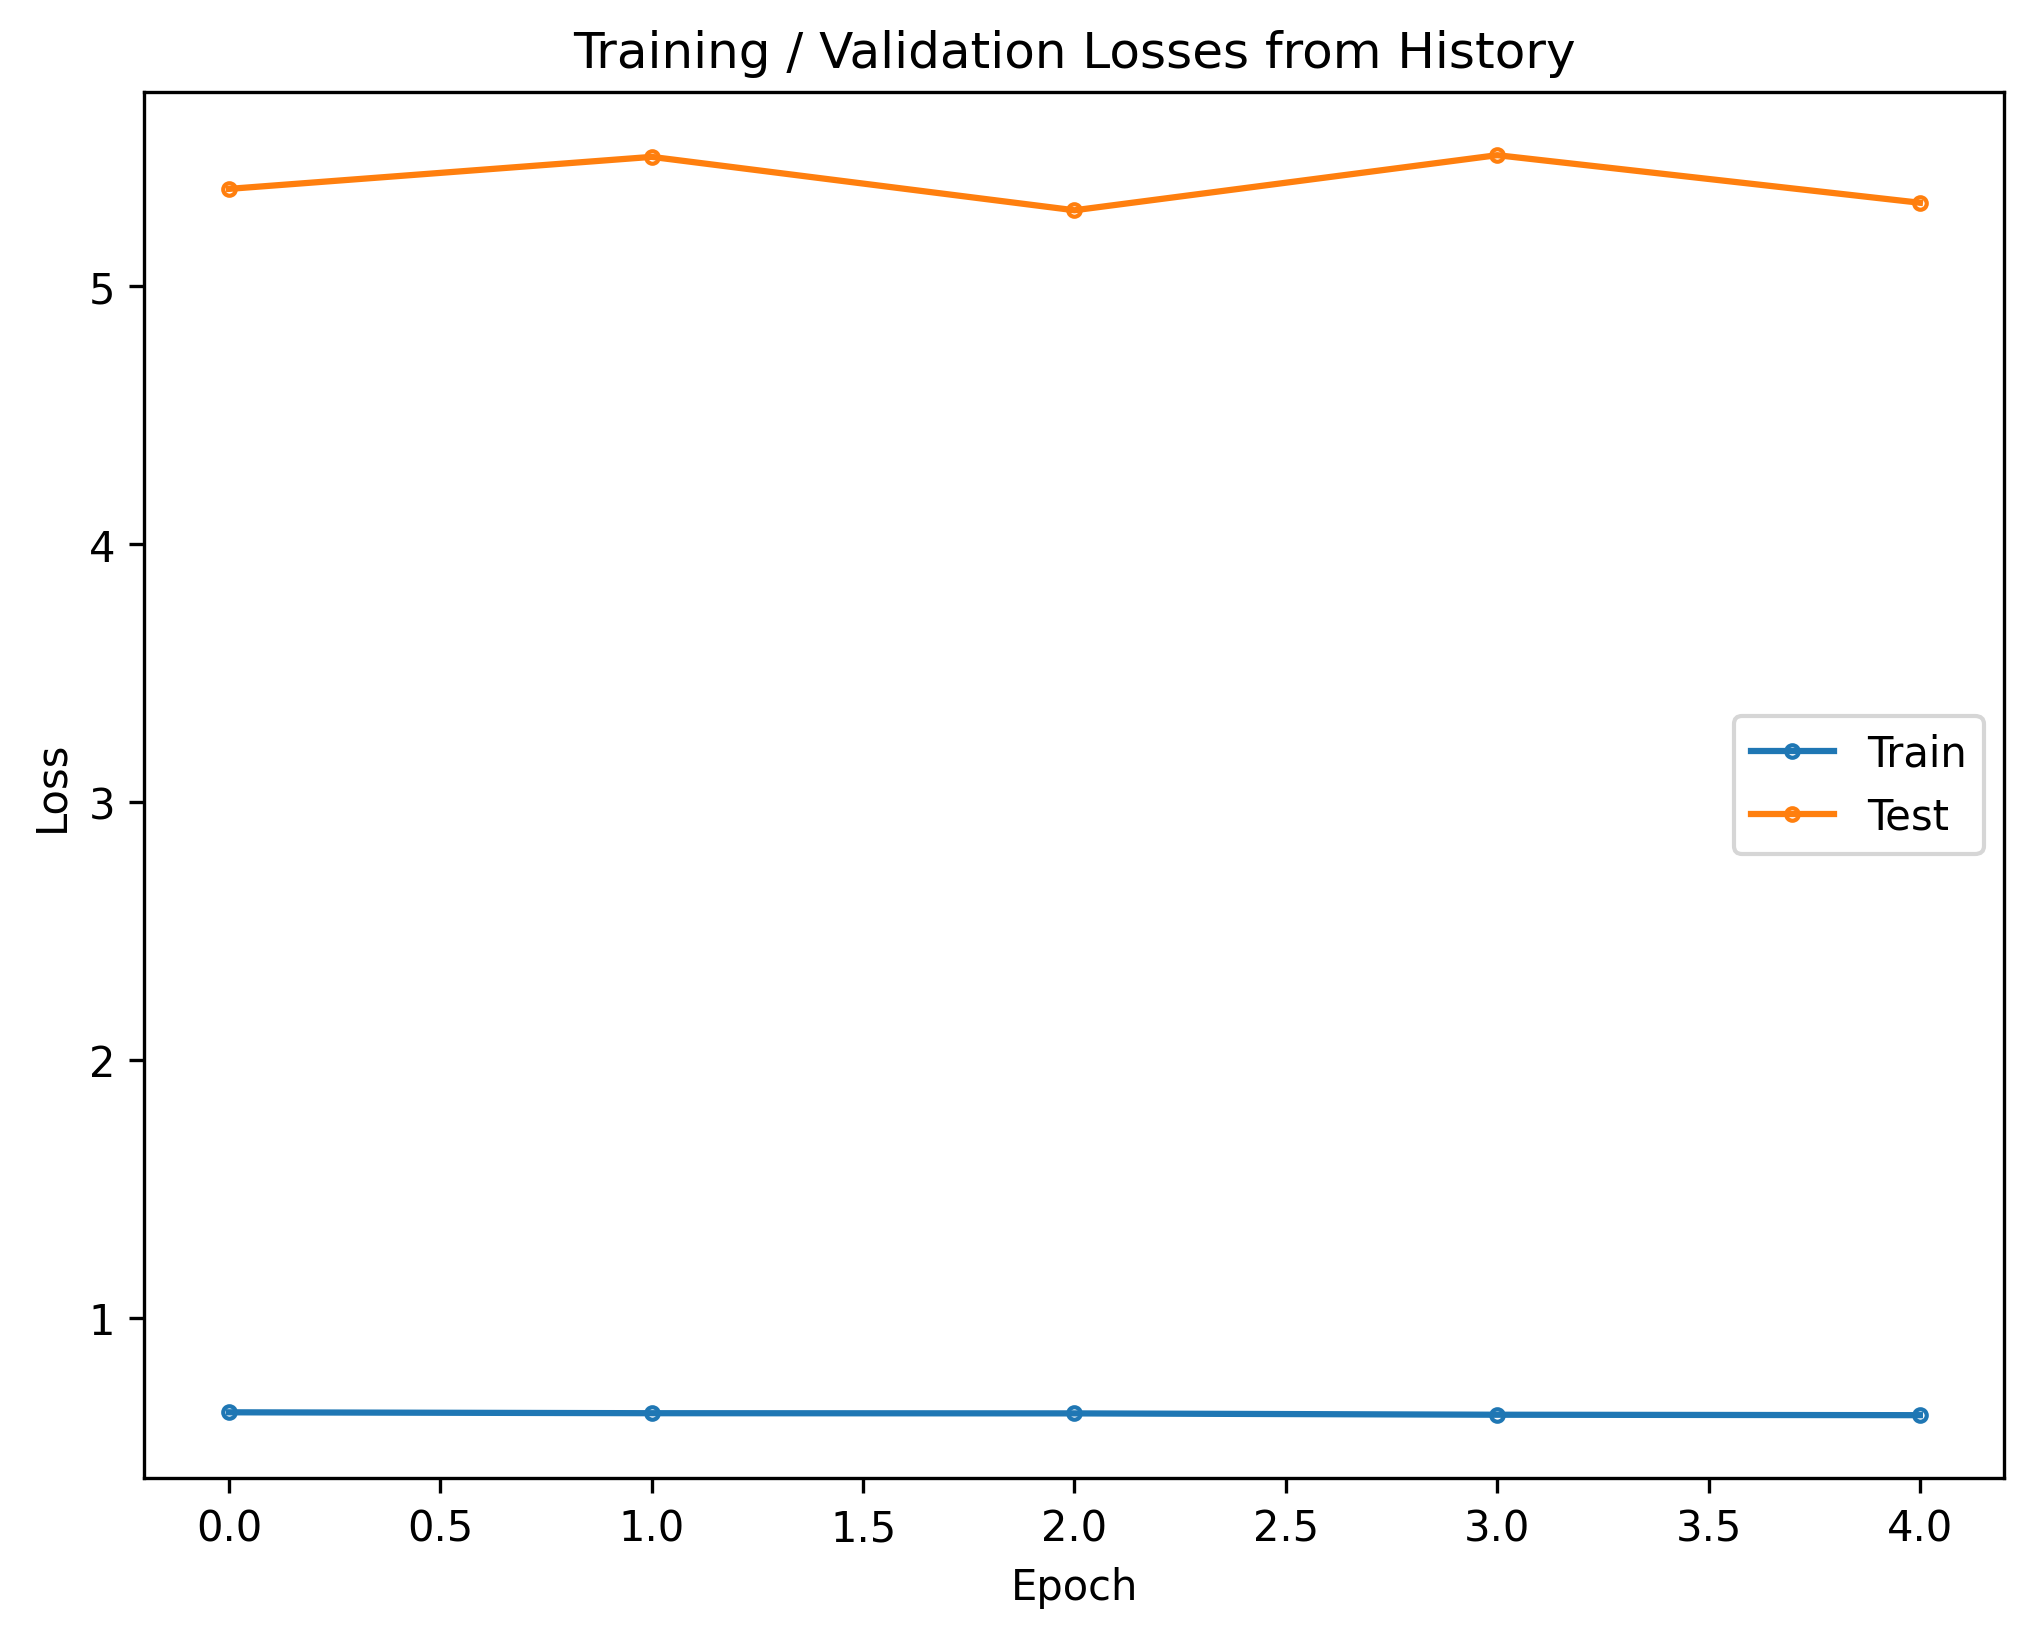

In [92]:
# Define parameters
NUM_EPOCHS = 5
bestPram = [1, 16, 'causal', 467, 0.24, 250,80] 
learning_rate = 0.0012987120382761917

# Train model for each data set
model_fundamental, res_fundamental = train_model(train_X_fundamental, train_y_fundamental, val_X_fundamental, val_y_fundamental, bestPram, learning_rate, NUM_EPOCHS)


In [ ]:
model_technical, res_technical = train_model(train_X_technical, train_y_technical, val_X_technical, val_y_technical, bestPram, learning_rate, NUM_EPOCHS)


In [ ]:
model_tech_fundamental, res_tech_fundamental = train_model(train_X_tech_fundamental, train_y_tech_fundamental, val_X_tech_fundamental, val_y_tech_fundamental, bestPram, learning_rate, NUM_EPOCHS)


In [93]:
def evaluate_performance(model, train_X, train_y, test_X, test_y, train_y_orig, test_y_orig, scaler):
    yhat_train = model.predict(train_X)
    yhat_test = model.predict(test_X)

    # reshape if necessary
    if yhat_train.ndim > 2:
        yhat_train = yhat_train.reshape(-1,1)
    if yhat_test.ndim > 2:
        yhat_test = yhat_test.reshape(-1,1)

    print('Train RMSE (SCALED)')
    timeseries_evaluation_metrics_func(train_y, yhat_train)

    print('Test RMSE (SCALED)')
    timeseries_evaluation_metrics_func(test_y, yhat_test)

    #Make Predictions (UNSCALED)
    yhat_train_inv = scaler.inverse_transform(yhat_train)
    yhat_test_inv = scaler.inverse_transform(yhat_test)

    diff_train = len(yhat_train_inv) - len(train_y_orig)
    diff = len(yhat_test_inv) - len(test_y_orig)
    if diff > 0:
      yhat_test_inv = yhat_test_inv[:-diff]
    elif diff < 0:
      test_y_orig = test_y_orig[:diff]

    print('TEST Performance Metrics (UNSCALED)')
    print(test_y_orig.shape)
    print(yhat_test_inv.shape)
    rmse = timeseries_evaluation_metrics_func(test_y_orig, yhat_test_inv)
    
    return rmse


In [104]:
if isinstance(test_y_fundamental_orig, pd.DataFrame) and 'Close' in test_y_fundamental_orig.columns:
    test_y_fundamental_orig = test_y_fundamental_orig['Close']

if isinstance(train_y_fundamental_orig, pd.DataFrame) and 'Close' in train_y_fundamental_orig.columns:
    train_y_fundamental_orig = train_y_fundamental_orig['Close']

rmse_fundamental = evaluate_performance(model_fundamental, train_X_fundamental, train_y_fundamental, test_X_fundamental, test_y_fundamental, train_y_fundamental_orig, test_y_fundamental_orig, scaler)


10/10 [==============================] - 0s 20ms/step
Train RMSE (SCALED)
Evaluation metric results:-
MAE is : 0.48778828243436245
RMSE is : 0.7797792425583111
MAPE is : 199.73446832036436
Test RMSE (SCALED)
Evaluation metric results:-
MAE is : 0.8261101274937986
RMSE is : 0.85914206047643
MAPE is : 172.45150553952357
TEST Performance Metrics (UNSCALED)
(314,)
(314, 1)
Evaluation metric results:-
MAE is : 13173.347727025965
RMSE is : 13696.114758699117
MAPE is : 59.66750105285341


In [105]:
if isinstance(test_y_technical_orig, pd.DataFrame) and 'Close' in test_y_technical_orig.columns:
    test_y_technical_orig = test_y_technical_orig['Close']

if isinstance(train_y_technical_orig, pd.DataFrame) and 'Close' in train_y_technical_orig.columns:
    train_y_technical_orig = train_y_technical_orig['Close']

rmse_technical = evaluate_performance(model_technical, train_X_technical, train_y_technical, test_X_technical, test_y_technical, train_y_technical_orig, test_y_technical_orig, scaler)


NameError: ignored

In [106]:
if isinstance(test_y_tech_fundamental_orig, pd.DataFrame) and 'Close' in test_y_tech_fundamental_orig.columns:
    test_y_tech_fundamental_orig = test_y_tech_fundamental_orig['Close']

if isinstance(train_y_tech_fundamental_orig, pd.DataFrame) and 'Close' in train_y_tech_fundamental_orig.columns:
    train_y_tech_fundamental_orig = train_y_tech_fundamental_orig['Close']
rmse_tech_fundamental = evaluate_performance(model_tech_fundamental, train_X_tech_fundamental, train_y_tech_fundamental, test_X_tech_fundamental, test_y_tech_fundamental, train_y_tech_fundamental_orig, test_y_tech_fundamental_orig, scaler)


NameError: ignored